<a href="https://colab.research.google.com/github/xuweibin123/Machine-learning-study/blob/main/mit_deeplearning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [ ]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [ ]:
'''TODO: Define a 2-d Tensor'''
# 方式1：直接创建二维数值张量（示例）
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
# 方式2：也可以用torch.zeros/torch.randn等创建，只要维度为2即可
# matrix = torch.zeros(2, 3)  # 2行3列的全0二维张量
# matrix = torch.randn(3, 4)  # 3行4列的随机二维张量

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.zeros(10, 3, 256, 256)  # 按指定形状创建全04维张量

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [ ]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([4, 5, 6])
`column_vector`: tensor([2, 5])
`scalar`: 2


In [ ]:

# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


In [ ]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x, self.W) + self.bias # TODO

        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)# TODO
        return y


In [ ]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.8818, 0.1765, 0.6113]], grad_fn=<SigmoidBackward0>)


In [ ]:
# 定义输入/输出节点数
n_input_nodes = 2
n_output_nodes = 3

# 定义模型：Sequential按顺序堆叠层（线性层 + sigmoid激活）
model = nn.Sequential(
    # 第一步：线性层（对应自定义层的W*x + bias）
    nn.Linear(n_input_nodes, n_output_nodes),
    # 第二步：非线性激活（对应自定义层的torch.sigmoid(z)）
    nn.Sigmoid()
)

# 测试模型（和之前自定义层的测试逻辑一致）
x_input = torch.tensor([[1, 2.]])
y = model(x_input)

# 打印结果
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.7160, 0.3362, 0.8040]], grad_fn=<SigmoidBackward0>)


Initializing x=-1.1139945983886719


/tmp/ipython-input-3868723131.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)  # 修正：原代码[x]会多一维，直接用x更简洁


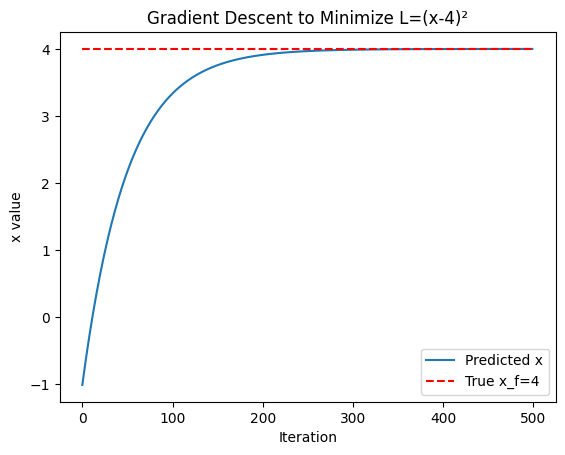

In [ ]:
import torch
import matplotlib.pyplot as plt  # 绘图需要导入的库

# 初始化随机的x（需要保留梯度，但先初始化一个标量）
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # 学习率（控制更新步长）
history = []
x_f = 4  # 目标值：我们希望x最终逼近4

# 梯度下降迭代优化
for i in range(500):
    # 重新包装x为带梯度追踪的张量（每次迭代重置梯度）
    x = torch.tensor(x, requires_grad=True)  # 修正：原代码[x]会多一维，直接用x更简洁

    # TODO：计算损失：(x - x_f)的平方（L=(x-x_f)²）
    loss = (x - x_f) ** 2  # 补全核心损失计算

    # 反向传播：计算loss对x的梯度（自动求导）
    loss.backward()

    # 梯度下降更新x：x = x - 学习率 * 梯度（detach()避免梯度追踪污染）
    x = x.item() - learning_rate * x.grad.item()

    # 记录每一步的x值，用于绘图
    history.append(x)

# 绘制x的优化过程
plt.plot(history)
plt.plot([0, 500], [x_f, x_f], 'r--')  # 红色虚线标记目标值4
plt.legend(('Predicted x', 'True x_f=4'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent to Minimize L=(x-4)²')
plt.show()

In [4]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml
# TODO: ENTER YOUR API KEY HERE!! instructions above
COMET_API_KEY = "sQITSYgK3G3w25tda3tzveVjP"

# Import PyTorch and other relevant libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

# Import all remaining packages
import numpy as np
import os
import time
import functools
from IPython import display as ipythondisplay
from tqdm import tqdm
from scipy.io.wavfile import write
!apt-get install abcmidi timidity > /dev/null 2>&1


# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert torch.cuda.is_available(), "Please enable GPU from runtime settings"
assert COMET_API_KEY != "", "Please insert your Comet API Key"



In [5]:
# Download the dataset
songs = mdl.lab1.load_training_data()

# Print one of the songs to inspect it in greater detail!
example_song = songs[0]
print("\nExample song: ")
print(example_song)

Found 817 songs in text

Example song: 
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!


In [ ]:
# Convert the ABC notation to audio file and listen to it
mdl.lab1.play_song(example_song)

In [7]:
# Join our list of song strings into a single string containing all songs
songs_joined = "\n\n".join(songs)

# Find all unique characters in the joined string
vocab = sorted(set(songs_joined))
print("There are", len(vocab), "unique characters in the dataset")

There are 83 unique characters in the dataset


In [8]:
### Define numerical representation of text ###

# Create a mapping from character to unique index.
# For example, to get the index of the character "d",
#   we can evaluate `char2idx["d"]`.
char2idx = {u: i for i, u in enumerate(vocab)}

# Create a mapping from indices to characters. This is
#   the inverse of char2idx and allows us to convert back
#   from unique index to the character in our vocabulary.
idx2char = np.array(vocab)

In [9]:
print('{')
for char, _ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  "'" :   5,
  '(' :   6,
  ')' :   7,
  ',' :   8,
  '-' :   9,
  '.' :  10,
  '/' :  11,
  '0' :  12,
  '1' :  13,
  '2' :  14,
  '3' :  15,
  '4' :  16,
  '5' :  17,
  '6' :  18,
  '7' :  19,
  ...
}


In [10]:
### Vectorize the songs string ###

'''TODO: Write a function to convert the all songs string to a vectorized
    (i.e., numeric) representation. Use the appropriate mapping
    above to convert from vocab characters to the corresponding indices.

  NOTE: the output of the `vectorize_string` function
  should be a np.array with `N` elements, where `N` is
  the number of characters in the input string
'''
def vectorize_string(string):
  return np.array([char2idx[s] for s in string])

vectorized_songs = vectorize_string(songs_joined)

In [11]:
print ('{} ---- characters mapped to int ----> {}'.format(repr(songs_joined[:10]), vectorized_songs[:10]))
# check that vectorized_songs is a numpy array
assert isinstance(vectorized_songs, np.ndarray), "returned result should be a numpy array"

'X:1\nT:Alex' ---- characters mapped to int ----> [49 22 13  0 45 22 26 67 60 79]


In [13]:
### Batch definition to create training examples ###

def get_batch(vectorized_songs, seq_length, batch_size):
    # the length of the vectorized songs string
    n = vectorized_songs.shape[0] - 1
    # randomly choose the starting indices for the examples in the training batch
    idx = np.random.choice(n - seq_length, batch_size)

    '''TODO: construct a list of input sequences for the training batch'''
    input_batch = [vectorized_songs[i : i + seq_length] for i in idx]

    '''TODO: construct a list of output sequences for the training batch'''
    output_batch = [vectorized_songs[i + 1 : i + 1 + seq_length] for i in idx]

    # Convert the input and output batches to tensors
    x_batch = torch.tensor(input_batch, dtype=torch.long)
    y_batch = torch.tensor(output_batch, dtype=torch.long)

    return x_batch, y_batch

# Perform some simple tests to make sure your batch function is working properly!
test_args = (vectorized_songs, 10, 2)
x_batch, y_batch = get_batch(*test_args)
assert x_batch.shape == (2, 10), "x_batch shape is incorrect"
assert y_batch.shape == (2, 10), "y_batch shape is incorrect"
print("Batch function works correctly!")

Batch function works correctly!


In [14]:
x_batch, y_batch = get_batch(vectorized_songs, seq_length=5, batch_size=1)

for i, (input_idx, target_idx) in enumerate(zip(x_batch[0], y_batch[0])):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx.item()])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx.item()])))


Step   0
  input: 29 (np.str_('D'))
  expected output: 14 (np.str_('2'))
Step   1
  input: 14 (np.str_('2'))
  expected output: 22 (np.str_(':'))
Step   2
  input: 22 (np.str_(':'))
  expected output: 82 (np.str_('|'))
Step   3
  input: 82 (np.str_('|'))
  expected output: 2 (np.str_('!'))
Step   4
  input: 2 (np.str_('!'))
  expected output: 0 (np.str_('\n'))


In [19]:
### Defining the RNN Model ###

'''TODO: Add LSTM and Linear layers to define the RNN model using nn.Module'''
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size

        # Define each of the network layers
        # Layer 1: Embedding layer to transform indices into dense vectors
        #   of a fixed embedding size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        '''TODO: Layer 2: LSTM with hidden_size `hidden_size`. note: number of layers defaults to 1.
         Use the nn.LSTM() module from pytorch.'''
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True) # TODO

        '''TODO: Layer 3: Linear (fully-connected) layer that transforms the LSTM output
        #   into the vocabulary size.'''
        self.fc = nn.Linear(hidden_size, vocab_size) # TODO

    def init_hidden(self, batch_size, device):
        # Initialize hidden state and cell state with zeros
        return (torch.zeros(1, batch_size, self.hidden_size).to(device),
                torch.zeros(1, batch_size, self.hidden_size).to(device))

    def forward(self, x, state=None, return_state=False):
        x = self.embedding(x)

        if state is None:
            state = self.init_hidden(x.size(0), x.device)
        out, state = self.lstm(x, state)

        out = self.fc(out)
        return out if not return_state else (out, state)

In [20]:
# Instantiate the model! Build a simple model with default hyperparameters. You
#     will get the chance to change these later.
vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 1024
batch_size = 8

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMModel(vocab_size, embedding_dim, hidden_size).to(device)

# print out a summary of the model
print(model)

LSTMModel(
  (embedding): Embedding(83, 256)
  (lstm): LSTM(256, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=83, bias=True)
)


In [21]:
# Test the model with some sample data
x, y = get_batch(vectorized_songs, seq_length=100, batch_size=32)
x = x.to(device)
y = y.to(device)

pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       torch.Size([32, 100])  # (batch_size, sequence_length)
Prediction shape:  torch.Size([32, 100, 83]) # (batch_size, sequence_length, vocab_size)


In [22]:
sampled_indices = torch.multinomial(torch.softmax(pred[0], dim=-1), num_samples=1)
sampled_indices = sampled_indices.squeeze(-1).cpu().numpy()
sampled_indices

array([ 3, 15, 43,  5, 19, 15, 21, 12, 26, 32, 18, 59, 48, 15, 32, 11, 14,
       39, 18,  4, 29, 44, 10, 26, 29,  3, 66, 46, 43, 68, 82, 60, 52, 34,
       40, 55, 73, 28,  1, 38, 50, 11, 56, 43, 26, 36, 47, 42, 26, 19,  0,
        4, 26, 25, 26, 77, 25, 53,  8, 11, 53, 56, 25, 61, 41, 29, 46, 45,
       19,  1, 24, 16, 79, 18, 75,  9, 42, 27, 49, 63, 60, 45, 22,  9, 55,
       40, 77, 36, 76, 66, 58, 53, 66, 59, 78, 20, 46, 12, 32,  7])

In [23]:
print("Input: \n", repr("".join(idx2char[x[0].cpu()])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))

Input: 
 'd dBG|cde ecA|GFE AFD|G3 G2:|!\n\nX:13\nT:Loftus Jones\nZ: id:dc-ocarolan-8\nM:C\nL:1/8\nK:G Major\ng4 f2e2|'

Next Char Predictions: 
 '"3R\'7390AG6dW3G/2N6#DS.AD"kURm|e[IO_rC MY/aRAKVQA7\n#A>Av>],/]a>fPDUT7 =4x6t-QBXheT:-_OvKukc]kdw8U0G)'


In [24]:
### Defining the loss function ###

# '''TODO: define the compute_loss function to compute and return the loss between
#     the true labels and predictions (logits). '''
cross_entropy = nn.CrossEntropyLoss() # instantiates the function
def compute_loss(labels, logits):
    """
    Inputs:
      labels: (batch_size, sequence_length)
      logits: (batch_size, sequence_length, vocab_size)

    Output:
      loss: scalar cross entropy loss over the batch and sequence length
    """

    # Batch the labels so that the shape of the labels should be (B * L,)
    batched_labels = labels.view(-1)

    ''' TODO: Batch the logits so that the shape of the logits should be (B * L, V) '''
    batched_logits = logits.view(-1, logits.shape[-1]) # TODO

    '''TODO: Compute the cross-entropy loss using the batched  next characters and predictions'''
    loss = cross_entropy(batched_logits, batched_labels) # TODO
    return loss

In [25]:
### compute the loss on the predictions from the untrained model from earlier. ###
y.shape  # (batch_size, sequence_length)
pred.shape  # (batch_size, sequence_length, vocab_size)

'''TODO: compute the loss using the true next characters from the example batch
    and the predictions from the untrained model several cells above'''
example_batch_loss = compute_loss(y, pred) # TODO

print(f"Prediction shape: {pred.shape} # (batch_size, sequence_length, vocab_size)")
print(f"scalar_loss:      {example_batch_loss.mean().item()}")

Prediction shape: torch.Size([32, 100, 83]) # (batch_size, sequence_length, vocab_size)
scalar_loss:      4.425019264221191


In [26]:
### Hyperparameter setting and optimization ###

vocab_size = len(vocab)

# Model parameters:
params = dict(
  num_training_iterations = 3000,  # Increase this to train longer
  batch_size = 8,  # Experiment between 1 and 64
  seq_length = 100,  # Experiment between 50 and 500
  learning_rate = 5e-3,  # Experiment between 1e-5 and 1e-1
  embedding_dim = 256,
  hidden_size = 1024,  # Experiment between 1 and 2048
)

# Checkpoint location:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")
os.makedirs(checkpoint_dir, exist_ok=True)

In [27]:
### Create a Comet experiment to track our training run ###

def create_experiment():
  # end any prior experiments
  if 'experiment' in locals():
    experiment.end()

  # initiate the comet experiment for tracking
  experiment = comet_ml.Experiment(
                  api_key=COMET_API_KEY,
                  project_name="6S191_Lab1_Part2")
  # log our hyperparameters, defined above, to the experiment
  for param, value in params.items():
    experiment.log_parameter(param, value)
  experiment.flush()

  return experiment

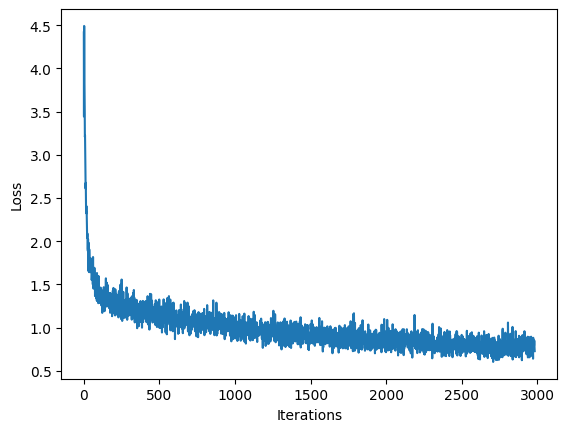

100%|██████████| 3000/3000 [01:30<00:00, 33.15it/s]


True

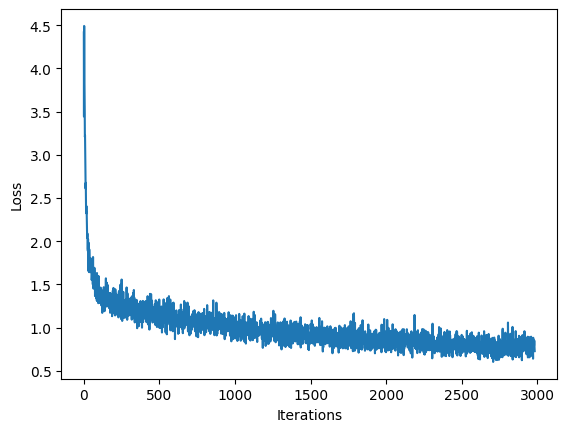

In [28]:
### Define optimizer and training operation ###

'''TODO: instantiate a new LSTMModel model for training using the hyperparameters
    created above.'''
model = LSTMModel(vocab_size=vocab_size, embedding_dim=params["embedding_dim"], hidden_size=params["hidden_size"])

# Move the model to the GPU
model.to(device)

'''TODO: instantiate an optimizer with its learning rate.
  Checkout the PyTorch website for a list of supported optimizers.
  https://pytorch.org/docs/stable/optim.html
  Try using the Adam optimizer to start.'''
optimizer = optim.Adam(model.parameters(), lr=params["learning_rate"])

def train_step(x, y):
  # Set the model's mode to train
  model.train()

  # Zero gradients for every step
  optimizer.zero_grad()

  # Forward pass
  '''TODO: feed the current input into the model and generate predictions'''
  y_hat = model(x)

  # Compute the loss
  '''TODO: compute the loss!'''
  loss = compute_loss(y, y_hat)

  # Backward pass
  '''TODO: complete the gradient computation and update step.
    Remember that in PyTorch there are two steps to the training loop:
    1. Backpropagate the loss
    2. Update the model parameters using the optimizer
  '''
  loss.backward()
  optimizer.step()

  return loss

##################
# Begin training!#
##################

history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
experiment = create_experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
for iter in tqdm(range(params["num_training_iterations"])):

    # Grab a batch and propagate it through the network
    x_batch, y_batch = get_batch(vectorized_songs, params["seq_length"], params["batch_size"])

    # Convert numpy arrays to PyTorch tensors
    x_batch = torch.tensor(x_batch, dtype=torch.long).to(device)
    y_batch = torch.tensor(y_batch, dtype=torch.long).to(device)

    # Take a train step
    loss = train_step(x_batch, y_batch)

    # Log the loss to the Comet interface
    experiment.log_metric("loss", loss.item(), step=iter)

    # Update the progress bar and visualize within notebook
    history.append(loss.item())
    plotter.plot(history)

    # Save model checkpoint
    if iter % 100 == 0:
        torch.save(model.state_dict(), checkpoint_prefix)

# Save the final trained model
torch.save(model.state_dict(), checkpoint_prefix)
experiment.flush()

In [29]:
### Prediction of a generated song ###

def generate_text(model, start_string, generation_length=1000):
  # Evaluation step (generating ABC text using the learned RNN model)

  '''TODO: convert the start string to numbers (vectorize)'''
  input_idx = vectorize_string(start_string) # TODO
  input_idx = torch.tensor([input_idx], dtype=torch.long).to(device)

  # Initialize the hidden state
  state = model.init_hidden(input_idx.size(0), device)

  # Empty string to store our results
  text_generated = []
  tqdm._instances.clear()

  for i in tqdm(range(generation_length)):
    '''TODO: evaluate the inputs and generate the next character predictions'''
    predictions, state = model(input_idx, state, return_state=True) # TODO

    # Remove the batch dimension
    predictions = predictions.squeeze(0)

    '''TODO: use a multinomial distribution to sample over the probabilities'''
    input_idx = torch.multinomial(torch.softmax(predictions, dim=-1), num_samples=1) # TODO

    '''TODO: add the predicted character to the generated text!'''
    # Hint: consider what format the prediction is in vs. the output
    text_generated.append(idx2char[input_idx.item()]) # TODO

  return (start_string + ''.join(text_generated))


'''TODO: Use the model and the function defined above to generate ABC format text of length 1000!
    As you may notice, ABC files start with "X" - this may be a good start string.'''
generated_text = generate_text(model, start_string="X", generation_length=1000) # TODO

100%|██████████| 1000/1000 [00:00<00:00, 1421.75it/s]


In [ ]:
### Play back generated songs ###

generated_songs = mdl.lab1.extract_song_snippet(generated_text)

for i, song in enumerate(generated_songs):
  # Synthesize the waveform from a song
  waveform = mdl.lab1.play_song(song)

  # If its a valid song (correct syntax), lets play it!
  if waveform:
    print("Generated song", i)
    ipythondisplay.display(waveform)

    numeric_data = np.frombuffer(waveform.data, dtype=np.int16)
    wav_file_path = f"output_{i}.wav"
    write(wav_file_path, 88200, numeric_data)

    # save your song to the Comet interface -- you can access it there
    experiment.log_asset(wav_file_path)